# Eksik Gözlem Analizi

<font color=green>
    
**Udemy - (50 Saat) Python A-Z™: Veri Bilimi ve Machine Learning**

Bölüm 8 - Veri Ön İşleme - Vahit Keskin anlattı. 
- 238. Eksik Gözlem Analizi
- 239. Eksik Veri Hızlı Çözüm
- 240. Eksik Veri Yapısının Görselleştirilmesi
- 241. Silme Yöntemleri
- 242. Basit Değer Atama Yöntemleri
- 243. Kategorik Değişken Kırılımında Değer Atama
- 244. Kategorik Değişkenler için Değer Atama
- 245. Tahmine Dayalı Değer Atama - KNN & Random Forests & EM
</font>

### İçindekiler

**`Eksik Veri Problemi`**

- Eksik veri nedir?

- Bir veri setinde eksik olma durumu nasıl ortaya çıkıyor?

- Eksik veriyi direkt silmenin veya doldurmanın zararları

- Eksik veriyi nasıl incelemek gerekir?

    - Veri setindeki eksikliğin yapısal bir eksiklik olup olmadığının bilinmesi gerekir. 
    
    - NA her zaman bir eksikliği ifade etmiyor olabilir. 
    
    - İlgili gözlem için sadece bir değişkende eksiklik var diye gözlemi tamamen silmek diğer değişkenlere ait bilgiyi kaybetmek anlamına gelir.
    

- Eksik veri türleri nelerdir? 

- Rassallığı inceleme teknikleri nelerdir?

**`Eksik Değerlerin Saptanması`**

- Eksikler
    - Değişkenlerdeki eksik değer sayısı 
    - Veri setindeki toplam eksik değer sayısı 
    - En az bir eksik değere sahip gözlemler

- Tamlar
    - Değişkenlerdeki tam değer sayısı
    - Değişkenlerdeki toplam değer sayısı 
    - Tüm değerleri tam olan gözlemler

**`Rassallığı İnceleme Tekniklerinden "Görselleştirme"`**

- Değişken bazında doluluk/eksiklik oranını görselleştirmek

- Gözlem bazında doluluk/eksiklik oranını görselleştirmek

- Değişkenler arasındaki nullity correlationı görselleştirmek

**`Eksik Veri Probleminin Giderilmesi`**

- **Silme Yöntemleri**

    - Gözlemlerin silinmesi
    
    - Değişkenlerin silinmesi
    
    
- **Değer Atama Yöntemleri**

    - Sayısal Değişkenlerde Atama İşlemi 
    
        - Tek bir değişkendeki eksik değerleri `fillna()` ile değerlerin ortalaması-medyanıyla veya kendi belirlediğimiz bir değerle doldurma
        
        - Tüm değişkenleri `df.fillna()`, `df.apply()`, `df.where` ile kendi ortalamalarıyla doldurma
        
        - Her bir değişkeni farklı şekilde doldurma
        
        - Kategorik Değişken Kırılımında Değer Atama 
        
    - Kategorik Değişkenler için Değer Atama İşlemi 
    
        - Kategorik değişken içerisinde en çok geçen değer ile yani moduyla doldurma
        
        - NaN olan gözlemin öncesi veya sonrasındaki gözlemin değeriyle doldurma
    
    - Tahmine Dayalı Değer Atama - KNN & Random Forests & EM
    
        - KNN (K-en yakın komşu) algoritmasıyla doldurma
        
        - Random forest algoritmasıyla doldurma 
        
        - EM (Expectation–Maximization) algoritmasıyla doldurma

## <font color="blue"> Eksik Veri Problemi </font>

### Eksik veri nedir?

İncelenen veri setindeki gözlemlerde eksiklikler olması durumunu ifade etmektedir. Bu problem veri girişleri, tablo birleştirme işlemleri ya da değişken dönüştürme işlemleri gibi işlemlerde ortaya çıkabilmektedir. 

### Bir veri setinde **eksik** olma durumu nasıl ortaya çıkıyor?

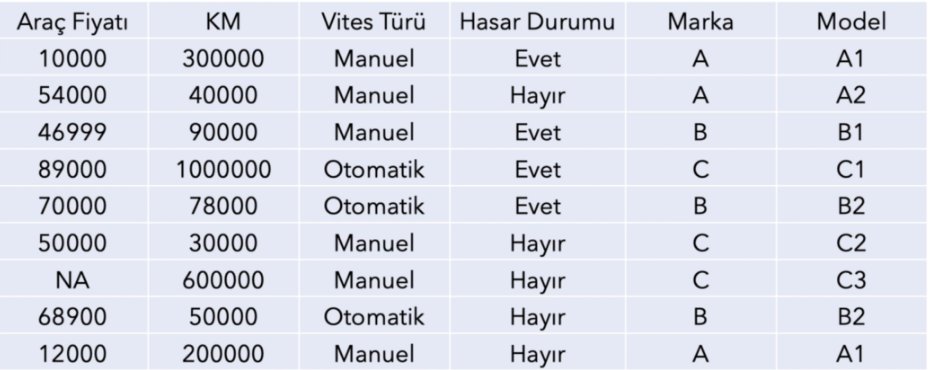

Burada Araç Fiyatı değişkeninde bir **NA** değeri var, yani boş demek. Bazen **Null**, **NaN** olarak karşımıza gelir. Böyle bir durumla karşılaştığımızda ya NA olan gözlem birimini yani satırı komple silebiliriz, ya da bazı yöntemler kullanarak buradaki NA'yı doldurabiliriz. **Silmek** ya da **doldurmak** istediğimizde bunu ne şekilde gerçekleştirebileceğimizi değerlendireceğiz.

### Eksik veriyi direkt silmenin veya doldurmanın zararları

Eksik değere sahip gözlemlerin veri setinden direkt çıkarılması ve rassallığının incelenmemesi yapılacak istatistiksel çıkarımların, modelleme çalışmalarının güvenirliliğini düşürecektir.

Bu eksiklikler eğer rastgele oluşmuşsa bu eksik değerlere sahip gözlemleri silebiliyoruz, aksi taktirde bunlar bazı yapısal problemlerden dolayı meydana gelmişse bunları olduğu şekliyle silmek bazı problemlere sebep olabilir. 

*Eksik gözlemlerin veri setinden direkt çıkarılabilmesi için veri setindeki eksikliğin bazı durumlarda kısmen bazı durumlarda tamamen **rastlantısal olarak oluşmuş olması gerekmektedir**. Eğer eksiklikler değişkenler ile ilişkili olarak ortaya çıkan **yapısal problemler** ile meydana gelmiş ise bu durumda yapılacak silme işlemleri ciddi yanlılıklara sebep olabilecektir.* (Tabachnick ve Fidell, 1996)

Rassallık kavramı karşımıza çıktı. Yani eğer veri seti içerisindeki eksiklikler rastgele oluşmadıysa bunları olduğu gibi çıkaramıyor ya da tahminlerle ve benzeri yöntemlerle direkt dolduramıyoruz. 

Bu durumda nasıl yaklaşmamız lazım?

### Eksik veriyi nasıl incelemek gerekir?

Eksik bilgiyi silmeden veya doldurmadan önce aşağıdaki 3 durumun göz önünde bulundurulup ona göre karar verilmesi gerekmektedir. 

#### <font color="green">1. Veri setindeki eksikliğin yapısal bir eksiklik olup olmadığının bilinmesi gerekir. </font>

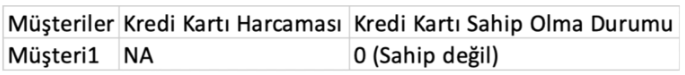

Örneğin; müşterilerimize ilişkin bir veri setimiz olsun. Bu veri setinde müşterilerimize ilişkin toplam kredi kartı harcaması gibi bir değişken olsun. Ve örneğin gözlemliyoruz ki bazı müşterilerimizde toplam kredi kartı harcaması isimli değişkende boşluklar/eksiklikler var. Bu eksiklikleri ya toplam kredi kartı harcaması değişkeninin ortalamasıyla doldurabiliriz ya da bu gözlemleri silebiliriz. Fakat buradaki problem şu: **Bu gözlemler acaba rastgele mi oluştu?** Yani bir şekilde veri aktarımı sırasında olabilir, veri girişleri sırasında olabilir, rastlantısal bir şekilde ortaya bir eksiklik mi çıktı **yoksa yapısal bir problemden mi çıktı** bunu bilmemiz gerekiyor.

Buradaki yapısal problemden kastımız ne? Örneğin aynı veri setimizin içerisinde bir de müşterilerimizin kredi kartı olması ya da olmaması durumunu ifade eden bir başka değişken olduğunu düşünelim. Yani kredi kartı var mı diye bir değişken olsun 1 kredi kartı var, 0 kredi kartı yok demiş olsun. Bu veri setini bu rassallığı incelemek üzere görselleştirdiğimizde, yapıları anlamaya çalıştığımızda gözlemlemiş olacağız ki zaten toplam kredi kartı harcaması değişkeninde NA yani eksiklik olan değerler muhtemelen kredi kartı olmayan müşteriler olacaktır. Burada toplam kredi kartı harcaması değişkenindeki eksiklikler aslında bakarsanız başka bir değişkenle ilişkili. Yani yapısal bir durumdan dolayı bunlar eksik. Diğer bir ifadeyle zaten kredi kartı olmayan bir kişinin toplam kredi kartı harcaması gibi bir değişkende değeri olmasını beklemeyiz. **Tek başına baktığımızda bir eksiklik olarak gözükebilir fakat çok değişkenli bir şekilde yani diğer değişkenlerle mantıksal sebep sonuç bağlamında bir değerlendirme yapıldığında gözlemleniyor ki bu senaryoda kullanıcılarımızın kredi kartı yok.** Bundan dolayı toplam kredi kartı harcaması değişkeninde boşluklar var. Bunları bir ortalamayla doldurmak mantıklı olmayacaktır. Aksine veri setinin içerisine eskisinden çok daha fazla problemli bir durum ortaya çıkaracaktır. Veri setinde kendimiz bir gürültü oluşturmuş olacağız. Bir yanlılığa sebep olacağız. Yani bir eksikliği gördüğümüzde o eksikliğin her zaman rastgele oluşmuş olacağı anlamına gelmiyor. 

#### <font color="green">2. NA her zaman bir eksikliği ifade etmiyor olabilir.  </font>

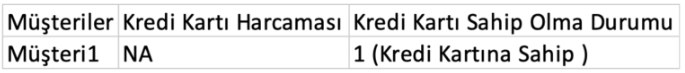

Yine aynı şekilde veri setimizde Kredi Kartı Harcaması ve Kredi Kartı Var mı Yok mu değişkeni var. Varsayalım ki Kredi Kartı Var mı Yok mu değişkeni 1 olsun (yani kredi kartı var olsun) ve toplam kredi kartı harcaması değişkeninde yine bir eksik gözlem gözlemlendiğini düşünelim. Bu sefer kredi kartı var tamam ama toplam kredi kartı harcaması değişkeninde yine NA değeri var. Belki kişi bu ayda kredi kartı harcaması yapmadı. Veya sisteme kaydoldu, kredi kartı da var, bilgilerini de kaydetti ama harcama yapmadı. Bu durumda ortaya çıkan NA aslında eksik değeri ifade etmiyor, toplam kredi kartı harcaması değişkeninin aslında değerinin 0 olduğunu ifade ediyor. NA her zaman eksiklik anlamına gelmez. **Bazen NA, gördüğümüz durumlarda ilgili olayla ilgili ölçüm yapılmadığı ya da ilgili değişkenin 0 olmasından kaynaklı** gözlemlenebilir. 

#### <font color="green">3. İlgili gözlem için sadece bir değişkende eksiklik var diye gözlemi tamamen silmek diğer değişkenlere ait bilgiyi kaybetmek anlamına gelir.  </font>

Elimizde yine bir veri seti var. Veri setimizin içerisinde 100 tane değişken var. Gözlemliyoruz ki örneğin bir gözlemde bir veya iki tane eksiklik var. Yani örneğin 99 tane değişkenin tüm değerleri tam, 100. değişkenin bir değerinde eksiklik var. Yani bir birey olarak veri setine baktığımızda bizle ilgili 100 tane değişken olduğunu düşünelim bizim özelliklerimizi betimleyen. Bunların 99 tanesi dolu, 1 tanesi boş/eksik. Eksik gözlemlerden ben direkt kurtulayım düşüncesiyle o 1 tane eksik değere sahip olan gözlemi sildiğimizde 99 tane farklı bilgiyi kaybetmiş oluyoruz. 

### <font color="black">Eksik veri türleri nelerdir? </font>

Birbirinden farklı türlerde eksik veriler var. Eksik veri probleminin çözümünde en önemli aşama bu eksik veri türünün ne olduğunun belirlenmesidir. Çünkü hangi çözüm ve atama yöntemine geçeceğimizi, hangi yöntemi kullanacağımıza buna göre karar veriyoruz. Bu eksik veri türlerini Rubin isimli bir kişi daha önce formulüze etmiş 1976 yılında.

1. **Tümüyle Rastlantısal Kayıp:** Diğer değişkenlerden ya da yapısal problemden kaynaklanmayan tamamen rastgele oluşan gözlemler. 

2. **Rastlantısal Kayıp:** Diğer değişkenlere bağlı olarak oluşabilen eksiklik türü. 

3. **Rastlantısal Olmayan Kayıp:** Göz ardı edilemeyecek olan ve yapısal problemler ile ortaya çıkan eksiklik türü. Buradaki eksiklik hem diğer değişkenlere bağımlılık ile ortaya çıkmış olabilir hem de mantıksal gürültüsel anlamda bazı problemlerle de ortaya çıkmış olabilir. *Bu en sevmediğimiz kayıp türü.* 

*Bizim için çalışmalarda silmek için ya da gönül rahatlığıyla ortalama vb. atama yöntemleriyle atayarak çalışmak için istediğimiz rastlantısal kayıp türü Tümüyle Rastlantısal Kayıp olması durumu.* 

### <font color="black">Rassallığı inceleme teknikleri nelerdir?</font>

Eksik veriyle baş etmek için silme ve doldurma işlemini ancak rassallıkla ilgili bir inceleme yaptıktan sonra yapabiliyoruz. Bu rassallığı incelemenin teknikleri:

- **Görsel Teknikler**
- Bağımsız Örneklem T Testi
- Korelasyon Testi
- Little'ın MCAR Testi

Pratikte uygulanan genelde görsel teknikler ve Little'ın MCAR Testi.

Biz uygulamamız kapsamında görsel teknikler ile aykırı gözlemlerin, eksik gözlemlerin oluşma patternlerinin, oluşma yapılarının rassallığını değerlendirmiş olacağız. 

## <font color="blue"> Eksik Değerlerin Saptanması </font>

In [50]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### - Eksikler -

#### <font color="green">Değişkenlerdeki eksik değer sayısı </font>

In [19]:
df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

#### <font color="green">Veri setindeki toplam eksik değer sayısı </font>

In [20]:
df.isnull().sum().sum()

7

#### <font color="green">En az bir eksik değere sahip gözlemler</font>

In [21]:
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


### - Tamlar -

#### <font color="green">Değişkenlerdeki tam değer sayısı </font>

In [27]:
df.notnull().sum()

V1    7
V2    6
V3    7
dtype: int64

#### <font color="green">Değişkenlerdeki toplam değer sayısı </font>

In [11]:
df.notnull().sum().sum()

20

#### <font color="green">Tüm değerleri tam olan gözlemler</font>

In [10]:
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [52]:
# Bu şekilde de yapabilirdik

df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()] 

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


## <font color="blue"> Rassallığı İnceleme Tekniklerinden "Görselleştirme" </font>

Eğer veri setimizin içerisindeki eksiklikler rastgele bir şekilde oluşmuyorsa, bunlara yapılacak olan **silme**, **doldurma** gibi çözümler ciddi yapısal problemlere neden olabilir. Bundan dolayı eksik verinin yapısını yani rassallığını incelemek gerekiyor. Bunu yapmanın yöntemlerinden birisi görselleştirme yöntemi.

### <font color="black">Değişken bazında doluluk/eksiklik oranını görselleştirmek</font>

In [ ]:
# !pip install missingno

In [ ]:
import missingno as msno

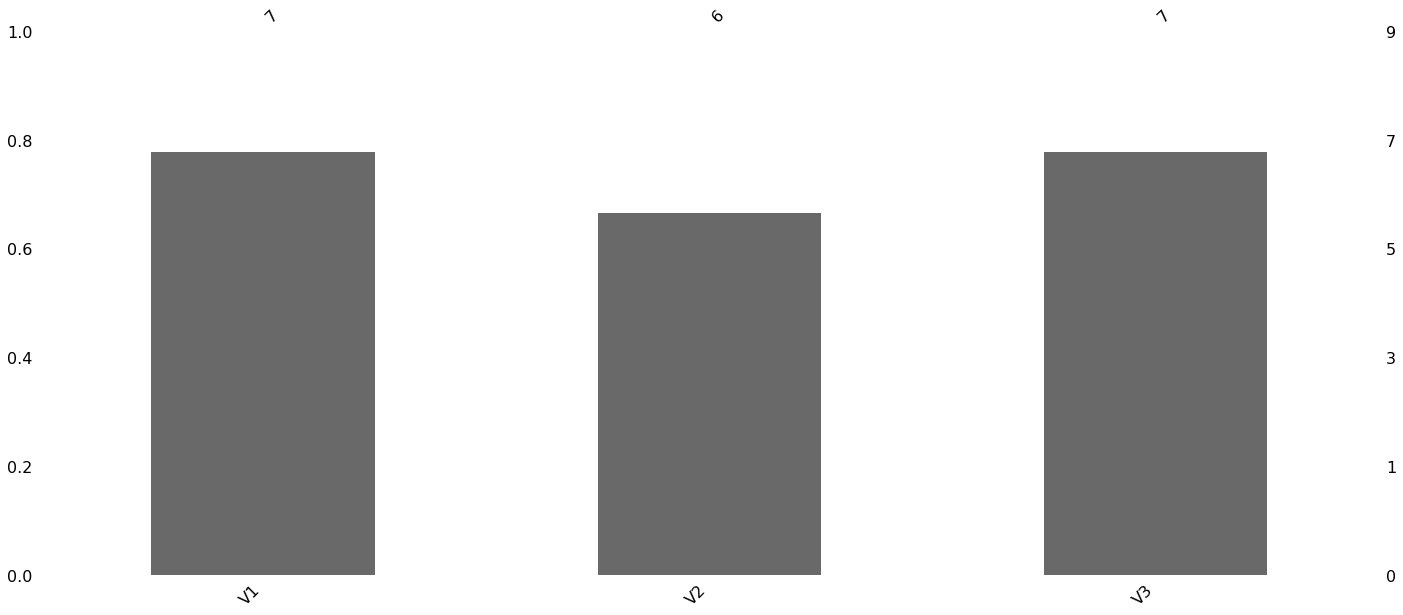

In [25]:
msno.bar(df);

Değişkenlerdeki tamlığı oransal olarak bu grafik ifade ediyor. Örneğin V1'de 7 tane tam gözlem varmış, V2'de 6 tane tam gözlem varmış, V3 değişkeninde 7 tane tam gözlem varmış. Yani V1'de 2 tane, V2'de 3 tane, V3'te 2 tane eksik gözlem var. Sol eksen tam olmanın yüzdesini ifade ederken sağ taraftaki eksen de elimizdeki veri setindeki gözlem sayısını ifade etmektedir. Bu genel hatlarıyla bize veri setinin içerisindeki eksikliklere ilişkin görsel bir bilgi sunmuş oluyor. Az önce nümerik olarak yaptığımız şeylerin aslında görsel bir karşılığı olmuş oluyor.

### <font color="black">Gözlem bazında doluluk/eksiklik oranını görselleştirmek</font>

##### <font color="green">Kendi oluşturduğumuz veri seti için:</font>

In [37]:
# Değişkenlerdeki eksik değer sayısı

df.isnull().sum()

V1    2
V2    3
V3    2
dtype: int64

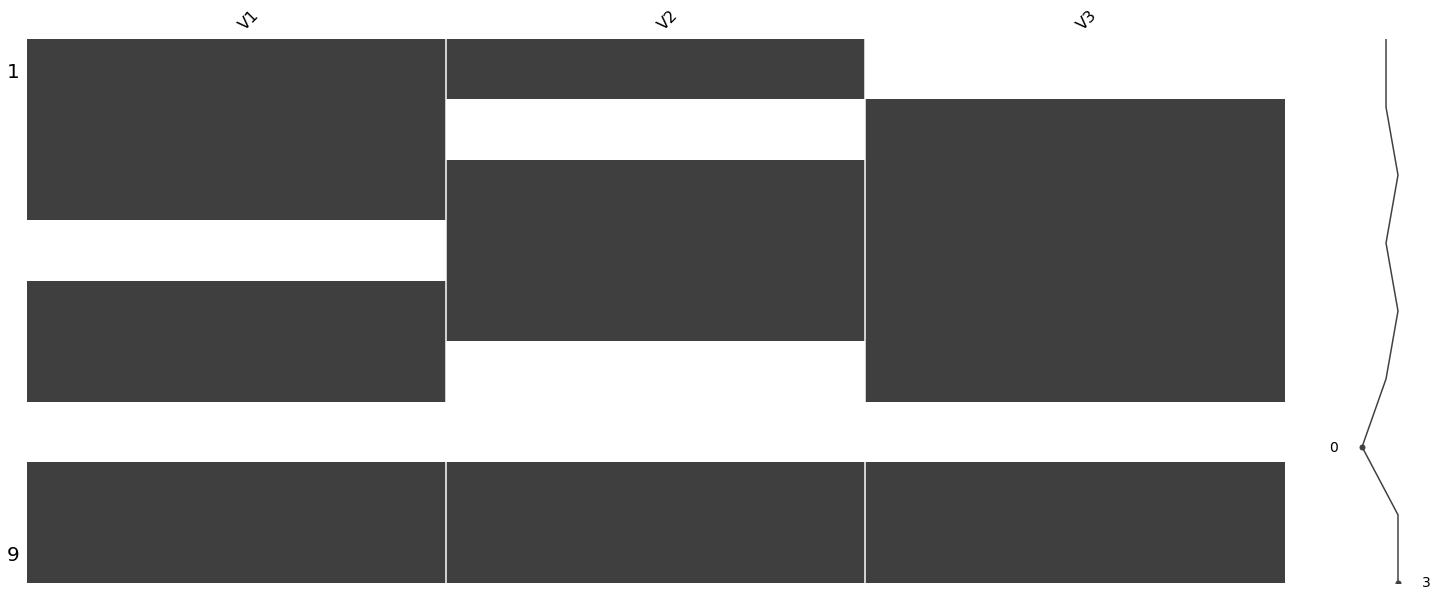

In [38]:
msno.matrix(df);

Bu grafik eksik değerlerin rassallığıyla ilgili gerekli yapısal bozuklukları yakalayabilme imkanı veren bir görsel. Soldaki eksen gözlem birimlerini ifade ediyor, yani yukarıdan aşağıya 1. gözlem, 2. gözlem şeklinde gidiyor. Çok fazla miktarda gözlem olduğunda üst üste koyduğumuzda bahsettiğimiz rassallık durumlarını gözlemleme imkanı yakalayacağız. 

Sağ taraftaki eksende 0 ve 3 değerleri var. Bu şu anlama geliyor: Aynı anda dolu olan değerler. Yani 3 tanesi aynı anda dolu. Bu da bize her bir gözlem birimine ilişkin değişkenlerin kaç tanesi dolu, kaç tanesi boş şeklinde bir bilgi sunmuş oluyor. Kıyaslamak için 0 ve 3'ü referans alıyoruz.

Elimizdeki dataframe'i incelediğimizde;
- 1. gözlem için V1 ve V2'nin dolu V3'ün boş olduğunu biliyoruz bunu görsel olarak da görebiliyoruz.
- 2. gözlem için baktığımızda V1 ve V3'ün dolu V2'nin boş olduğunu görüyoruz. 
- 6. gözlemin tamamı boş. 

Dolayısıyla bu grafik bize bir yapı verdi. Bizim göz yordamıyla belki onlarca belki yüzlerce gözlem biriminin olduğu yapılarda yakalanamayacak olan durumları gözleme imkanı bulmuş oluyoruz. 

In [31]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


##### <font color="green">Seaborn kütüphanesinde bulunan "planets" veri seti için:</font>

In [45]:
import seaborn as sns
df_p = sns.load_dataset('planets')
df_p.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Planet dataseti gezegenlerle ilgili, galaksilerle ilgili bazı bilgileri barındırıyordu içerisinde ve içerisinde de ciddi miktarda eksik değer vardı. 

In [46]:
df_p.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

Örneğin bunları silmeye ya da bazı yöntemlerle doldurmaya karar vermek istiyoruz ama diyoruz ki rassallık gibi bir şeyden bahsedildi. Eksik değerleri direkt öyle dolduramıyorduk veya direkt silemiyorduk. Şimdi napacağız? 

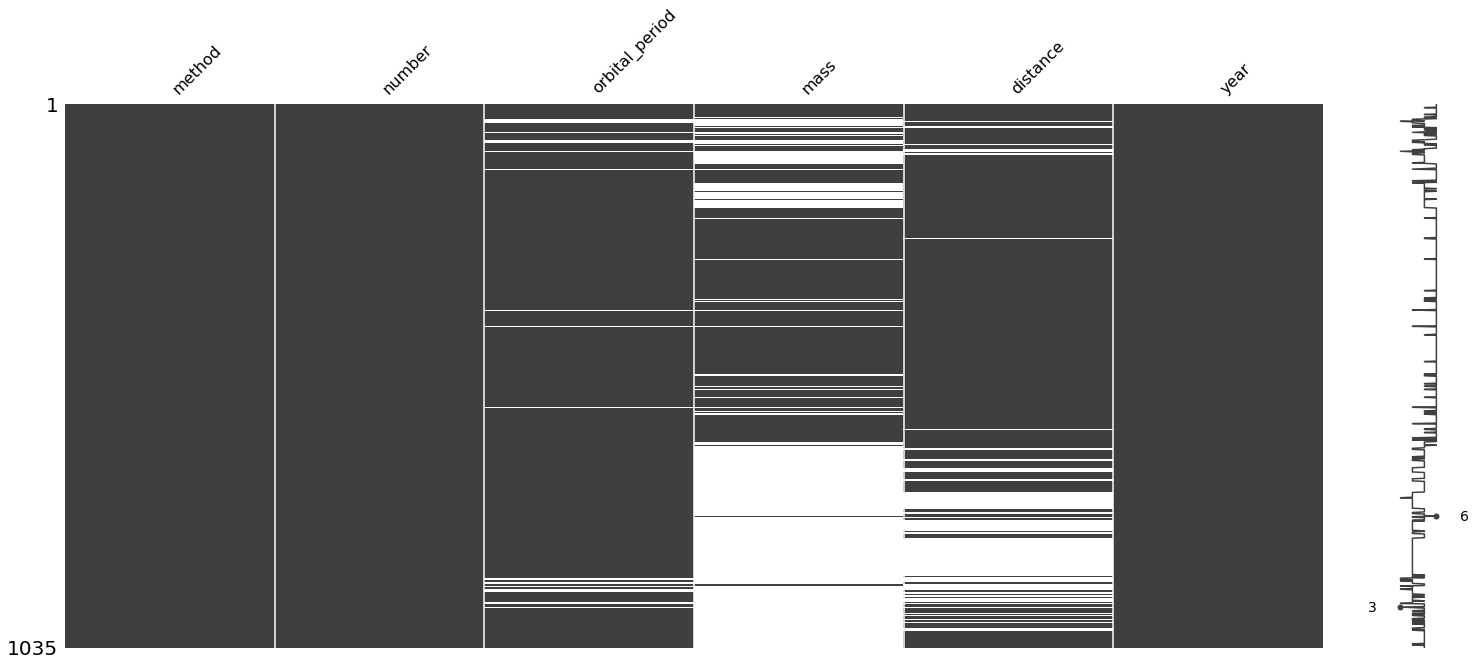

In [47]:
msno.matrix(df_p);

Burada sol taraftaki eksene odaklanacak olursak 1'den 1035'e kadar tüm gözlem birimleri ifade edilmiş. Buna karşılık olarak da değişkenler ifade edilmiş. Sağ tarafta 3 ve 6 değerleri verilmiş, aynı anda 6 tane dolu olma durumu ve aynı anda 3 tane dolu olma durumu gözlenmiş.

**Burada teknik olarak yapısal bir problem var mı yok mu bunu nasıl anlayabiliriz?**

*orbital_period & mass*

Bu görsel teknikte 'orbital_period' isimli değişkene odaklanalım. Boşluklara odaklanalım. Burada bir boşluk görüntülendiğinde mass değişkeninde de bir boşluk olmuş. Burada başka bir boşluk olduğunda masste yine bir boşluk gözlenmiş. Orbital_periodda ne zaman bir eksiklik olsa massta bu gözlemlenmiş. Biraz daha aşağılara gelindiğinde massta bir eksiklik var ama orbital_periodda yok. Hemen bir bağımlılık yapısı kendini kolayca hissettiriyor. Daha aşağılara indiğimizde yine aynı şekilde orbital_periodda eksiklik varsa massta da var. Çok açık bir biçimde gözlemleniyor ki burada orbital_period değişkeniyle mass değişkeni arasında bir ilişki var. Yani mass'taki eksikliklerin bazıları orbital_period değişkenine bağlı olarak gerçekleşmiş. Dolayısıyla kredi kartı örneğimizdeki gibi bir bağımlılık durumu söz konusu. Kredi kartı olmayan kişilerin nasıl ortalama aylık kredi kartı harcaması olabilir ki? Çünkü kredi kartları yok gibi birbirine bağımlı bir durum gözlemleniyor. 

*mass & distance* 

Benzer şekilde masstan distance'a doğru bir inceleyelim. Mass'ta eksiklik var, distance'da yok. Mass ile distance arasında çok böyle ciddi bir ilişki var gibi gözükmüyor. Ama en aşağı bölgelerde yine distance'ın bazı değerlerinin hep karşılığı bulunmuş. Burada çok net bir ilişki yok fakat bir bağımlılık durumu olduğu açık. Dolayısıyla iş bilgisi dediğimiz arka tarafta bu değişkenlerin yapısıyla ilgili bir bilgimiz olmadığını varsayarsak bu durumda da çok net bir şekilde bu değişkenlerin arasında bir bağımlılık durumu söz konusu. Yani yorumumuz nedir? Rassallığı inceliyorduk ve görünen o ki değişkenler arasında burada ciddi bir bağımlılık söz konusu ve bu veri setine özel eksik değerlerin rastgele oluşmadığı yorumunu yapıyoruz. 

### <font color="black">Değişkenler arasındaki nullity correlationı görselleştirmek</font>

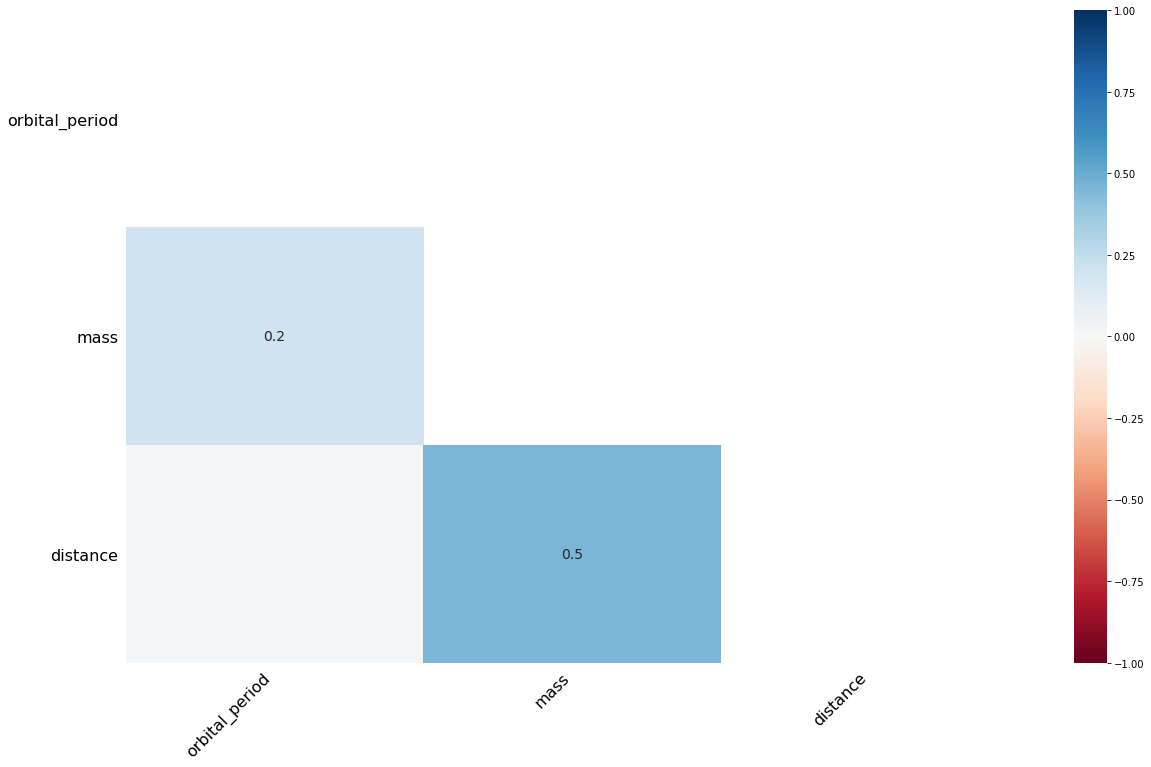

In [48]:
msno.heatmap(df_p);

msno içerisindeki ısı haritası bize "nullity correlation" isminde bir korelasyon değeri verir. Bu değerler -1 ile +1 arasında yer alır. Değişkenlerin arasındaki boşluk korelasyonu (nullity correlation); değişkenlerin birbirlerine olan bağımlılıklarını yani eksikliğin rassal olarak oluşmama durumunu bize nümerik olarak ifade eden bir gösterim. 

Eğer iki değişkenin nullity correlation değeri 1 ise bu iki değişkenin eksikliği *çok yüksek korelasyonla birlikte* meydana geliyor anlamına gelir. Diğer bir ifadeyle eğer bir değişkende eksiklik görürseniz çok yüksek ihtimalle diğer değişkende de eksiklik göreceksiniz anlamına geliyor. *(Bu kütüphanenin teknik dokümantasyonda kesinlikle gibi bir ifade kullanılmış ama istatistik varsa kesinlik yoktur. Bu sebeple ben yüksek ihtimalle şeklinde değerlendirmenizi öneririm.)* Eğer nullity correlation değeri 0 ise bu durumda aralarında birbirlerini etkileyen bir korelasyon yoktur yorumu yapılır.

- *distance* ile *mass* değişkenine baktığımızda 0.5 şeklinde bir korelasyon var. Yani yorumumuz şu olacak: mass değişkeniyle distance değişkeni arasında nullity correlation yani eksiklik korelasyon değeri incelendiğinde orta şiddetli bir korelasyon olduğu anlamı çıkmaktadır. 

-  *orbital_period* için değerlendirecek olursak tüm eksenlere baktığımızda aslında buradaki değişkenlerle arasında çok ciddi bir korelasyon gözlenmiyor ama bizim de tespit ettiğimiz *mass* değişkeniyle arasında bir ilişki olduğu gözlemlenebiliyor. 

Netice olarak burada kayda değer iki tane korelasyon değeri var. Bunlar *mass* değişkeniyle *orbital_period* değişkenleri arasındaki ilişki ve *mass* değişkeniyle *distance* değişkenleri arasındaki ilişki. 

Yapısal olarak da nümerik bir karşılık olarak da gözlemliyoruz ki bu veri seti rassal bir eksikliğe sahip değildir. Yani burada direkt doldurma ya da direkt silme gibi işlemleri yapmak bir takım problemleri de beraberinde getirecektir. Bu işlem yapılacaksa bu değişkenlerin birbirlerine olan bağımlılığı mutlaka göz önünde bulundurulmalıdır. Literatürü incelediğimizde yapılmamasına yönelik olarak daha fazla yönlendirme görmüş olacağız. 

## <font color="blue">Eksik Veri Probleminin Giderilmesi </font>

Elimizdeki veride eksiklikler olması durumunda bu eksiklikleri **silebiliriz** ya da **doldurabiliriz.** 

<font color="purple">**Silme Yöntemleri**</font>

- **Gözlem ya da değişken silme yöntemi**
- **Liste bazında silme yöntemi (Listwise Method)**
- **Çiftler bazında silme yöntemi (Pairwise Method)**

Biz genelde pratikte eksikliğini saptamış olduğumuz bir **değişkenin** eğer içerisinde %70 ve civarında eksiklik varsa bu değişkeni komple sileriz. Ya da bir **gözlem biriminin** içerisinde belirli bir orandan daha fazla eksiklik varsa mesela bu %50-60 olabilir bu durumda bu gözlemi de direkt sileriz. Çünkü ilgili gözlem birimi örneğin diğer değişkenlerin %50-60'ında hiçbir bilgiye sahip değil. Dolayısıyla bu gözlem biriminin çalışmada tutulmasının hiçbir anlamı yok. Benzer şekilde eğer bir değişkenin değerleri incelendiğinde bunun da içerisinde %50-%60 eksiklik varsa bu durumda bu değişkenin de veri setinde durmasının bir anlamı yok gibi düşünerek bu değişken ya da gözlem birimlerini sileriz. 

<font color="purple">**Değer Atama Yöntemleri** </font>

- **Ortanca, ortalama, medyan**


- **En Benzer Birime Atama (hot deck)**: 
    *Gözlem birimlerinin birbirlerine olan benzerlikleri uzaklık hesaplarıyla hesaplanıp eksikliğe sahip olan gözlem birimi en yakın hangi gözleme yakınsa onun değerleriyle doldurma işlemi gerçekleştiriliyor.*
    
    
- **Dış Kaynaklı Atama**:
    *Daha öncesinden bilinen sabit bir değerin buraya atanması uygun görülüyorsa bu şekilde atanması şeklinde çalışmış oluyor.* 


- **Tahmine Dayalı Yöntemler** (İleri seviye yöntemler):
    *Bu yöntemlerde eksikliğe sahip olan değerler bağımlı değişkenmişçesine kabul görüp dağa sonra bir modelleme çalışması yapılıp diğer değişkenlerle arasındaki ilişkiler modellenerek bir tahmin etme işlemi gerçekleştirilmiş oluyor.*
    
    - Makine Öğrenmesi
    - EM
    - Çoklu Atama Yöntemi 



### Silme Yöntemleri

In [1]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### <font color="green">Gözlemlerin silinmesi</font>

In [2]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


**`df.dropna()` kodu değişkenlerde tek bir NaN değer olsa dahi o gözlemi siliyor.**

In [3]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


*Geçici bir şekilde silmiş oldu, bunu kalıcı yapmak için inplace=True argümanını kullanabiliriz.*

In [4]:
#df.dropna(inplace=True)

**`df.dropna(how = "all")` kodu değişkenlerin hepsi NaN değerdeyse o gözlemi siliyor.**

In [6]:
df.dropna(how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


*6. gözlemi sildi.*

#### <font color="green">Değişkenlerin silinmesi</font>

**`df.dropna(axis = 1)` kodu en az bir tane eksik değere sahip olan değişkeni siler.** 

*Bunu çalıştırdığımızda hiçbir gözlemin kalmamasını bekleriz çünkü hepsinde en az zaten birer adet eksiklik var.*  

In [40]:
df.dropna(axis = 1)

""
0
1
2
3
4
5
6
7
8


**`df.dropna(axis = 1, how = "all")` kodu tüm değerleri NaN olan değişkenleri siler.**

In [8]:
df.dropna(axis = 1, how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


*Tüm değerleri NaN olan bir değişken olmadığı için bu silme işlemi gerçekleşmedi. Bu yüzden dataframe'e tüm değerleri NaN olan bir değişken ekliyoruz.*

In [9]:
df["V4"] = np.nan

In [10]:
df

,V1,V2,V3,V4
0,1.0,7.0,NaN,NaN
1,3.0,NaN,12.0,NaN
2,6.0,5.0,5.0,NaN
3,NaN,8.0,6.0,NaN
4,7.0,12.0,14.0,NaN
5,1.0,NaN,7.0,NaN
6,NaN,NaN,NaN,NaN
7,9.0,2.0,2.0,NaN
8,15.0,3.0,31.0,NaN


In [11]:
df.dropna(axis = 1, how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


*Kodu tekrar çalıştırdığımızda son eklediğimiz V4 sütununun silindiğini görüyoruz.*

In [12]:
df.dropna(axis = 1, how = "all", inplace = True) # kalıcı olarak silmesi için yazdık.

In [13]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Değer Atama Yöntemleri

#### <font color="purple">Sayısal Değişkenlerde Atama İşlemi  </font>

In [14]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


##### <font color="green">Tek bir değişkendeki eksik değerleri `fillna()` ile değerlerin ortalaması-medyanıyla veya kendi belirlediğimiz bir değerle doldurma</font>

**V1 değişkenini ortalama değerleriyle dolduruyoruz.**

In [30]:
df["V1"].mean()

6.0

In [31]:
df["V1"] = df["V1"].fillna(df["V1"].mean())

In [32]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,6.0,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,6.0,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


**V2 değişkenindeki eksik değerleri "0" ile dolduruyoruz.**

In [37]:
df["V2"] = df["V2"].fillna(0)

In [38]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,0.0,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,0.0,7.0
6,NaN,0.0,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


##### <font color="green">Tüm değişkenleri `df.fillna()`, `df.apply()`, `df.where` ile kendi ortalamalarıyla doldurma</font>

In [39]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [40]:
# birinci yol

df.fillna(df.mean()[:])

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


*`df.fillna()` direkt çalıştırdığımızda bütün değişkenlerde bir doldurma işlemi yapacak olduğunu biliyor çünkü vektörel bir fonksiyon. Tamam ama neye göre dolduracağım sorusunu da yine df üzerine bir mean fonksiyonu kullanarak yani her bir değişkenin ortalamasını hesaplama işlemine sokarak gerçekleştiriyoruz. `[:]` bütün gözlemleri göz önünde bulundur anlamına geliyor.*

In [41]:
# ikinci yol

df.apply(lambda x: x.fillna(x.mean()), axis = 0)

# pandas applyı görünce dataframe'in her bir sütunu üzerinde işlem yapacağını anlıyor
# lambda ile veriyoruz ne yapacağını. Her bir değişkeni gördüğünde bunları doldur. 
# O değişkenlerin ortalamasıyla.
# axisi 0 yapacağız çünkü satırlara göre göz önünde bulundurmuş olacak. 

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


*mean ile değil de medyan ile de doldurmak istersek aynı işlemi yapabiliriz.*

In [43]:
# üçüncü yol

df.where(pd.notna(df), df.mean(), axis="columns")

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


##### <font color="green">Her bir değişkeni farklı şekilde doldurma</font>

Diyelim ki dağılımlarına baktık değişkenlerin ve gözlemledik ki V1 ve V2 değişkeninin dağılımları düzgün, simetrik, normal dağılım eğiliminde. Bu durumda bunları ortalamayla doldurabiliriz. Bu mantıklı bir doldurma olur. Fakat eğer dağılımlarda sağa çarpık sola çarpık yapısal bir bozukluk varsa bu durumda bunları ortalamayla doldurmak mantıklı olmayacaktır. Bu durumda bazı değişkenlere ortalama, bazılarına median değerini atamak istiyorsak aşağıdaki şekilde yapacağız.

In [47]:
df.fillna(df.mean()["V1":"V2"])  # V1'den V2'ye kadar git mean ile doldur.

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [48]:
df["V3"].fillna(df["V3"].median()) # V3'ü ise median ile doldur.

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

##### <font color="green">Kategorik Değişken Kırılımında Değer Atama </font>

Elimizde çalışanlar ve bu çalışanlara ilişkin yaş, maaş, departman gibi değişkenlerin olduğu bir veri seti olduğunu düşünelim. Diyelim ki bir çalışanımızın maaş değişkeninde bir eksiklik var. Buraya kadar öğrendiğimiz tekniklerle yapabileceğimiz iki şey var: Birincisi bu eksik değere sahip kişiyi silmek. İkincisi eksik değere sahip olan kişinin ilgili değişkendeki eksik değerini ortalamayla veya medyanla doldurmak. Diyelim ki ibunu ortalamayla doldurduk. Bu çalışan maaş skalası yüksek olan bir departmanda çalışıyorsa ya da tam tersi bu kişi maaş skalası daha düşük olan bir departmanda çalışıyorsa bu durumda şirketin bütün çalışanlarını bir arada düşünüp şirketin genel maaş ortalamasını bu kişinin maaşıymışçasına atamak çok mantıklı olmayacaktır. Aksine çok ciddi yanıltıcı olacaktır. 

Eğer veri setimizi var olan bazı kategorik değişkenler özelinde kırarsak yani indirgersek örneğin; pazarlama departmanının maaş ortalamasını ata ya da arge departmanının maaş ortalamasını ata şeklinde bir kırılıma sokarsak veri setini bu durumda çok çok daha doğru bir değer atama işlemi gerçekleştirmiş oluruz. Hatta burada bir adım daha ileri gidilebilir. Mesela departmanın içerisinde uzmanlığına göre kaç yıl uzmanlığı var 5 yıl uzmanlığı olanların maaşı belirli bir seviyededir, yeni girenlerin uzman yardımcılarının maaşı belirli bir seviyededir. Bu şekilde buraya bir kırılım daha ekleyebilirsek mesela uzmanlıklar gibi çok çok daha doğru bir eksik değer atama işlemi gerçekleşmiş olacaktır.

In [49]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])

df = pd.DataFrame(
        {"maas" : V1,
         "V2" : V2,
         "V3" : V3,
        "departman" : V4}        
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


Departmanlara göre maaş ortalamalarına bakmak istediğimizi düşünelim. Bunun için önce veri setini departmanlara göre gruplayacağım sonra maaşların ortalamasını alacağım. 

In [50]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [71]:
df.loc[:,["maas","departman"]]

,maas,departman
0,1.0,IT
1,3.0,IT
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


Buradaki NaN ifadelerini çalışanların bulundukları departmanları göz önüne alarak; ilgili departmanın ortalama maaş değeriyle doldurmak için `transform()` fonksiyonunu kullanıyoruz. 

In [70]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

#### <font color="purple">Kategorik Değişkenler için Değer Atama İşlemi  </font>

In [72]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


##### <font color="green">Kategorik değişken içerisinde en çok geçen değer ile yani moduyla doldurma</font>

In [73]:
df["departman"].mode()

0    IK
dtype: object

Departmanın modunu aldığımızda çıkan şeyden sadece ilgili değeri alabilmek için sonuna [0] da ekliyoruz.

In [74]:
df["departman"].fillna(df["departman"].mode()[0])

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

Birinci indeksteki NaN olan yere IK değeri atanmış oldu.

In [76]:
df["departman"].fillna(df["departman"].mode()[0], inplace=True) # kalıcı hale getirmek için

In [77]:
df

,maas,departman
0,1.0,IT
1,3.0,IK
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


##### <font color="green">NaN olan gözlemin öncesi veya sonrasındaki gözlemin değeriyle doldurma</font>

In [78]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype=object)

df = pd.DataFrame(
        {"maas" : V1,
        "departman" : V4}        
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


**Önceki gözlemin değeriyle doldurmak istersek bunu `fillna(method = "ffill")` ile gerçekleştiriyoruz.**

In [79]:
df["departman"].fillna(method = "ffill") 

0    IT
1    IT
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

*Önceki değer IT idi bu yüzden NaN olan yer IT oldu.*

**Sonraki gözlemin değeriyle doldurmak istersek bunu `fillna(method = "bfill")` ile gerçekleştiriyoruz.**

In [82]:
df["departman"].fillna(method = "bfill") 

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

 *Sonraki değer IK idi bu yüzden NaN olan yer IK oldu.*

#### <font color="purple">Tahmine Dayalı Değer Atama - KNN & Random Forests & EM  </font>

Bu yöntemde elimizdeki eksik değere sahip olan değişken, makine öğrenmesi algoritmalarını kullanarak diğer değişkenlerce modellenip buna göre değerleri doldurululuyor.

In [83]:
import seaborn as sns
import missingno as msno

df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

Age isimli değişkende 177 adet eksik değer varmış. Bunu tahmine dayalı yöntemleri kullanarak nasıl doldurabileceğimizi öğrenmiş olacağız. Bu işlemleri yapabilmek için `ycimpute` isimli bir modül indiriyoruz.

In [84]:
# !pip install ycimpute

##### <font color="green">KNN (K-en yakın komşu) algoritmasıyla doldurma işlemi gerçekleştiriyoruz.</font>

In [85]:
from ycimpute.imputer import knnimput

Bu atama işlemini yapabilmemiz için knnimput fonksiyonu bizden bir numpy arrayi bekliyor. Bu yüzden datasetimizi bir numpy arrayine çevirmemiz gerekiyor. Bu sırada sütun adları kaybolacağı için yeniden dataframe'imizi oluşturabilmek için bunları saklayacağız.

In [86]:
var_names = list(df)

In [87]:
var_names

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [90]:
import numpy as np

n_df = np.array(df)

In [91]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

*Dataframe'deki bir satır arrayde bir listeye tekabül ediyor.*

In [88]:
df[0:10]

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
5,0,3,NaN,0,0,8.4583
6,0,1,54.0,0,0,51.8625
7,0,3,2.0,3,1,21.0750
8,1,3,27.0,0,2,11.1333
9,1,2,14.0,1,0,30.0708


In [92]:
n_df.shape

(891, 6)

`complete(n_df)` fonksiyonu ile numpy array listesini doldur demiş oluyoruz.

In [93]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.116
Imputing row 101/891 with 0 missing, elapsed time: 0.116
Imputing row 201/891 with 0 missing, elapsed time: 0.116
Imputing row 301/891 with 1 missing, elapsed time: 0.116
Imputing row 401/891 with 0 missing, elapsed time: 0.116
Imputing row 501/891 with 0 missing, elapsed time: 0.116
Imputing row 601/891 with 0 missing, elapsed time: 0.116
Imputing row 701/891 with 0 missing, elapsed time: 0.116
Imputing row 801/891 with 0 missing, elapsed time: 0.116


Şu anda doldurma işlemini gerçekleştirdi. Eksik olarak görmüş olduğu gözlemleri doldurdu fakat bu dff isimli nesne bir numpy arrayi. Bu sebeple bunu bir pandas dataframe'ine çevirmemiz gerekiyor.

In [94]:
type(dff)

numpy.ndarray

Daha önce saklamış olduğumuz değişken isimlerini bu numpy arrayine isimlendirme yaparak ekleyerek bunun üzerinden bir dataframe oluşturuyoruz.

In [95]:
import pandas as pd

dff = pd.DataFrame(dff, columns = var_names)

In [96]:
type(dff)

pandas.core.frame.DataFrame

Bu yeni oluşturmuş olduğumuz pandas dataframe'i üzerinden eksik değerleri tekrar sorgulayalım. 

In [97]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

Eksik değerlerin doldurulduğunu görüyoruz. Arka taraftaki işlemlerle ilgili hiçbir test yapmadık. Bir görselleştirme vs. yapmadık. Direkt eksik olduğunu bildiğimiz değerler için KNN algoritmasını kullanarak eksiklikleri doldurmuş olduk. 

##### <font color="green">Random forest algoritmasıyla doldurma işlemi gerçekleştiriyoruz.</font>

In [98]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
df_r=df.copy()

In [99]:
df_r.isnull().sum()

survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [100]:
var_names = list(df_r)

Yine bir numpy arrayine dönüştürme işlemi gerçekleştiriyoruz.

In [101]:
import numpy as np

n_df = np.array(df_r)

Random forest algoritmasıyla doldurma işlemini gerçekleştiriyoruz.

In [103]:
from ycimpute.imputer import iterforest

dff = iterforest.IterImput().complete(n_df)

# hata vermesine rağmen kod çalıştı. 

AttributeError: module 'ycimpute.imputer.iterforest' has no attribute 'IterImput'

In [104]:
dff = pd.DataFrame(dff, columns = var_names)

In [105]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

##### <font color="green">EM (Expectation–Maximization) algoritmasıyla doldurma işlemi gerçekleştiriyoruz.</font>

In [106]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])

In [107]:
from ycimpute.imputer import EM

In [108]:
var_names = list(df)

In [109]:
import numpy as np
n_df = np.array(df)

In [110]:
dff = EM().complete(n_df)

In [111]:
dff = pd.DataFrame(dff, columns = var_names)

In [112]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64